<a href="https://colab.research.google.com/github/thanhdangg/Plant-Disease/blob/main/Notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:

# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES
# TO THE CORRECT LOCATION (/kaggle/input) IN YOUR NOTEBOOK,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.

import os
import sys
from tempfile import NamedTemporaryFile
from urllib.request import urlopen
from urllib.parse import unquote, urlparse
from urllib.error import HTTPError
from zipfile import ZipFile
import tarfile
import shutil

CHUNK_SIZE = 40960
DATA_SOURCE_MAPPING = 'lacaydata:https%3A%2F%2Fstorage.googleapis.com%2Fkaggle-data-sets%2F5054086%2F8482074%2Fbundle%2Farchive.zip%3FX-Goog-Algorithm%3DGOOG4-RSA-SHA256%26X-Goog-Credential%3Dgcp-kaggle-com%2540kaggle-161607.iam.gserviceaccount.com%252F20240527%252Fauto%252Fstorage%252Fgoog4_request%26X-Goog-Date%3D20240527T135558Z%26X-Goog-Expires%3D259200%26X-Goog-SignedHeaders%3Dhost%26X-Goog-Signature%3D25e03112b313b7850279619c23e5ce9b71395b69857573741d82ae6529d4a76fc037eb0034ff09b719d0c0b54eb5ee3f8de0a7774bd0df1e3966f810154c43d7a85cf721f5da11cd600d05e99adfd305e58833c029d66787de4773aa5c1ba3cec6815e02720852a6ce5bb86f818da633b7950f6c89d2b881bc73ed67a5f553d062dbcffcf12efd08560af16c167cabf4128acccc42c1ca689deacadba952619ae53173026d3119b2ef85e676645e72d278402108cc7ac461f441265984f09d03b0983d1d9db1c920cb805b9c97d3c47eae99b3c66726275855a2cda8929bbde1d5d592053369374629c6b7d677f295feebec57187cbb4f106788f7a61e148954'

KAGGLE_INPUT_PATH='/kaggle/input'
KAGGLE_WORKING_PATH='/kaggle/working'
KAGGLE_SYMLINK='kaggle'

!umount /kaggle/input/ 2> /dev/null
shutil.rmtree('/kaggle/input', ignore_errors=True)
os.makedirs(KAGGLE_INPUT_PATH, 0o777, exist_ok=True)
os.makedirs(KAGGLE_WORKING_PATH, 0o777, exist_ok=True)

try:
  os.symlink(KAGGLE_INPUT_PATH, os.path.join("..", 'input'), target_is_directory=True)
except FileExistsError:
  pass
try:
  os.symlink(KAGGLE_WORKING_PATH, os.path.join("..", 'working'), target_is_directory=True)
except FileExistsError:
  pass

for data_source_mapping in DATA_SOURCE_MAPPING.split(','):
    directory, download_url_encoded = data_source_mapping.split(':')
    download_url = unquote(download_url_encoded)
    filename = urlparse(download_url).path
    destination_path = os.path.join(KAGGLE_INPUT_PATH, directory)
    try:
        with urlopen(download_url) as fileres, NamedTemporaryFile() as tfile:
            total_length = fileres.headers['content-length']
            print(f'Downloading {directory}, {total_length} bytes compressed')
            dl = 0
            data = fileres.read(CHUNK_SIZE)
            while len(data) > 0:
                dl += len(data)
                tfile.write(data)
                done = int(50 * dl / int(total_length))
                sys.stdout.write(f"\r[{'=' * done}{' ' * (50-done)}] {dl} bytes downloaded")
                sys.stdout.flush()
                data = fileres.read(CHUNK_SIZE)
            if filename.endswith('.zip'):
              with ZipFile(tfile) as zfile:
                zfile.extractall(destination_path)
            else:
              with tarfile.open(tfile.name) as tarfile:
                tarfile.extractall(destination_path)
            print(f'\nDownloaded and uncompressed: {directory}')
    except HTTPError as e:
        print(f'Failed to load (likely expired) {download_url} to path {destination_path}')
        continue
    except OSError as e:
        print(f'Failed to load {download_url} to path {destination_path}')
        continue

print('Data source import complete.')


[==================================================] 586955435 bytes downloaded
Downloaded and uncompressed: lacaydata
Data source import complete.


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory
i = 0
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
#         print(os.path.join(dirname, filename))
        i+=1
print("Number images: ", i)

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

Number images:  37010


In [7]:
print("Number images: ", i)

Number images:  37010


In [8]:
train_path = '/kaggle/input/lacaydata/train'
valid_path = '/kaggle/input/lacaydata/valid'

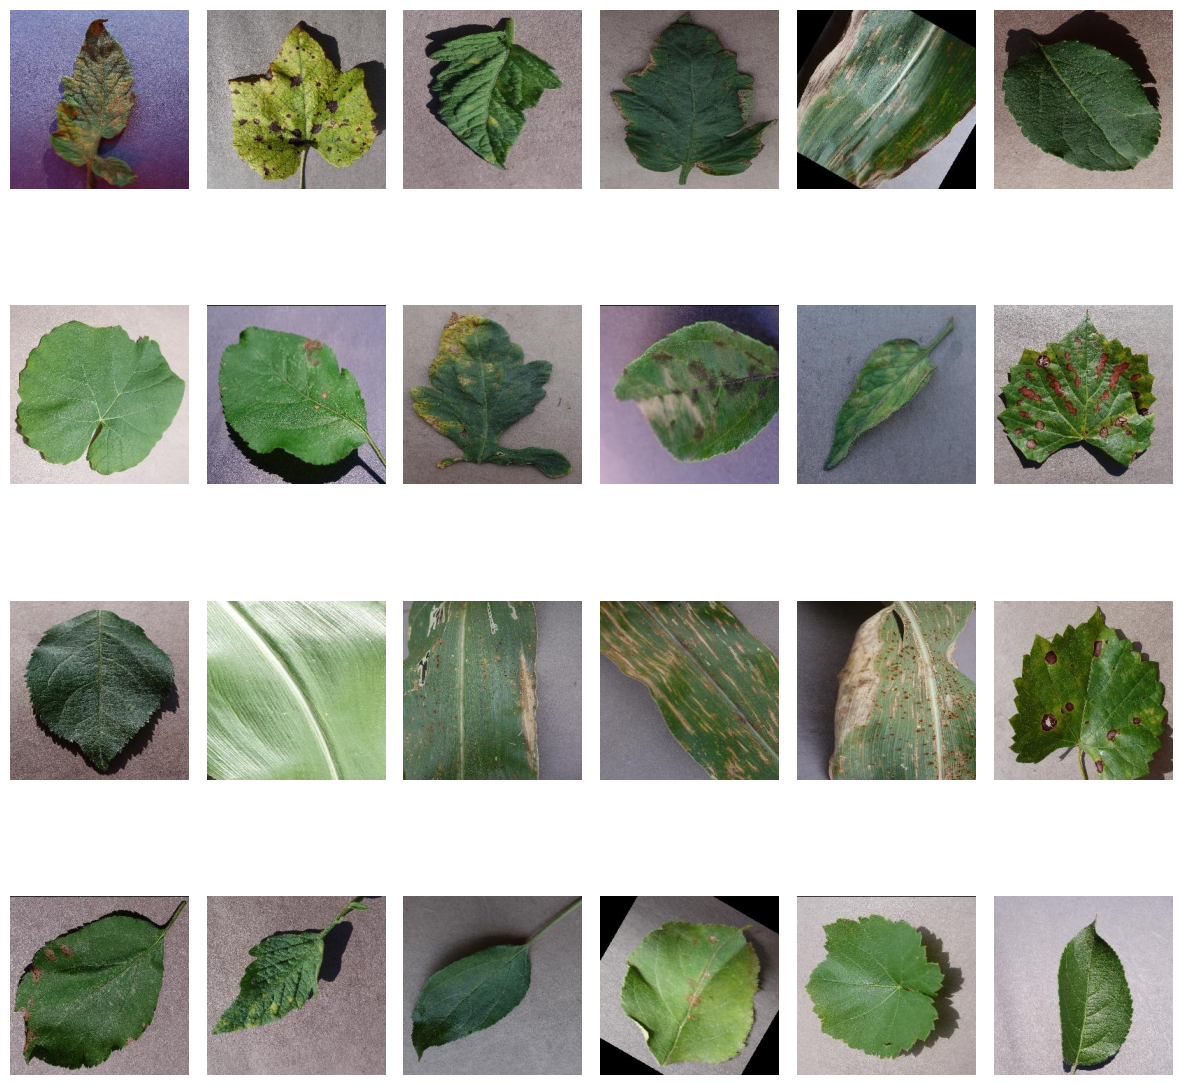

In [9]:
import matplotlib.pyplot as plt
import os
import pandas as pd
import seaborn as sns
import numpy as np
import cv2
plt.figure(figsize=(15,15))
plt.subplots_adjust(wspace=0.1, hspace=0.1)

for i in range(24):
    random_folder=np.random.randint(0,len(os.listdir(train_path)))
    random_folder_path=os.path.join(train_path,os.listdir(train_path)[random_folder])
    random_image=np.random.randint(0,len(os.listdir(random_folder_path)))
    random_image_path=os.path.join(random_folder_path,os.listdir(random_folder_path)[random_image])

    image=cv2.imread(random_image_path)
    image=cv2.cvtColor(image,cv2.COLOR_BGR2RGB)

    plt.subplot(4,6,i+1)
    plt.imshow(image)
    plt.axis("off")
plt.show()


In [10]:
class_names = os.listdir(train_path)
print(class_names)

['Corn_(maize)___Common_rust_', 'Apple___Apple_scab', 'Grape___Black_rot', 'Corn_(maize)___healthy', 'Tomato___healthy', 'Apple___healthy', 'Tomato___Bacterial_spot', 'Grape___Esca_(Black_Measles)', 'Tomato___Leaf_Mold', 'Apple___Black_rot', 'Grape___healthy', 'Apple___Cedar_apple_rust', 'Tomato___Tomato_mosaic_virus', 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot', 'Corn_(maize)___Northern_Leaf_Blight', 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)']


In [11]:
print("Number of classes : {}".format(len(class_names)))

Number of classes : 16


In [12]:
number_of_images = {}
for class_name in class_names:
    number_of_images[class_name] = len(os.listdir(train_path+"/"+class_name))

images_each_class = pd.DataFrame(list(number_of_images.items()), columns=['Class Name', 'Number of Images'])


In [13]:
images_each_class

,Class Name,Number of Images
0,Corn_(maize)___Common_rust_,1907
1,Apple___Apple_scab,2016
2,Grape___Black_rot,1888
3,Corn_(maize)___healthy,1859
4,Tomato___healthy,1926
5,Apple___healthy,2008
6,Tomato___Bacterial_spot,1702
7,Grape___Esca_(Black_Measles),1920
8,Tomato___Leaf_Mold,1882
9,Apple___Black_rot,1987


<ipython-input-14-5265a1f170c0>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y='Class Name', x='Number of Images', data=images_each_class,palette="tab20")


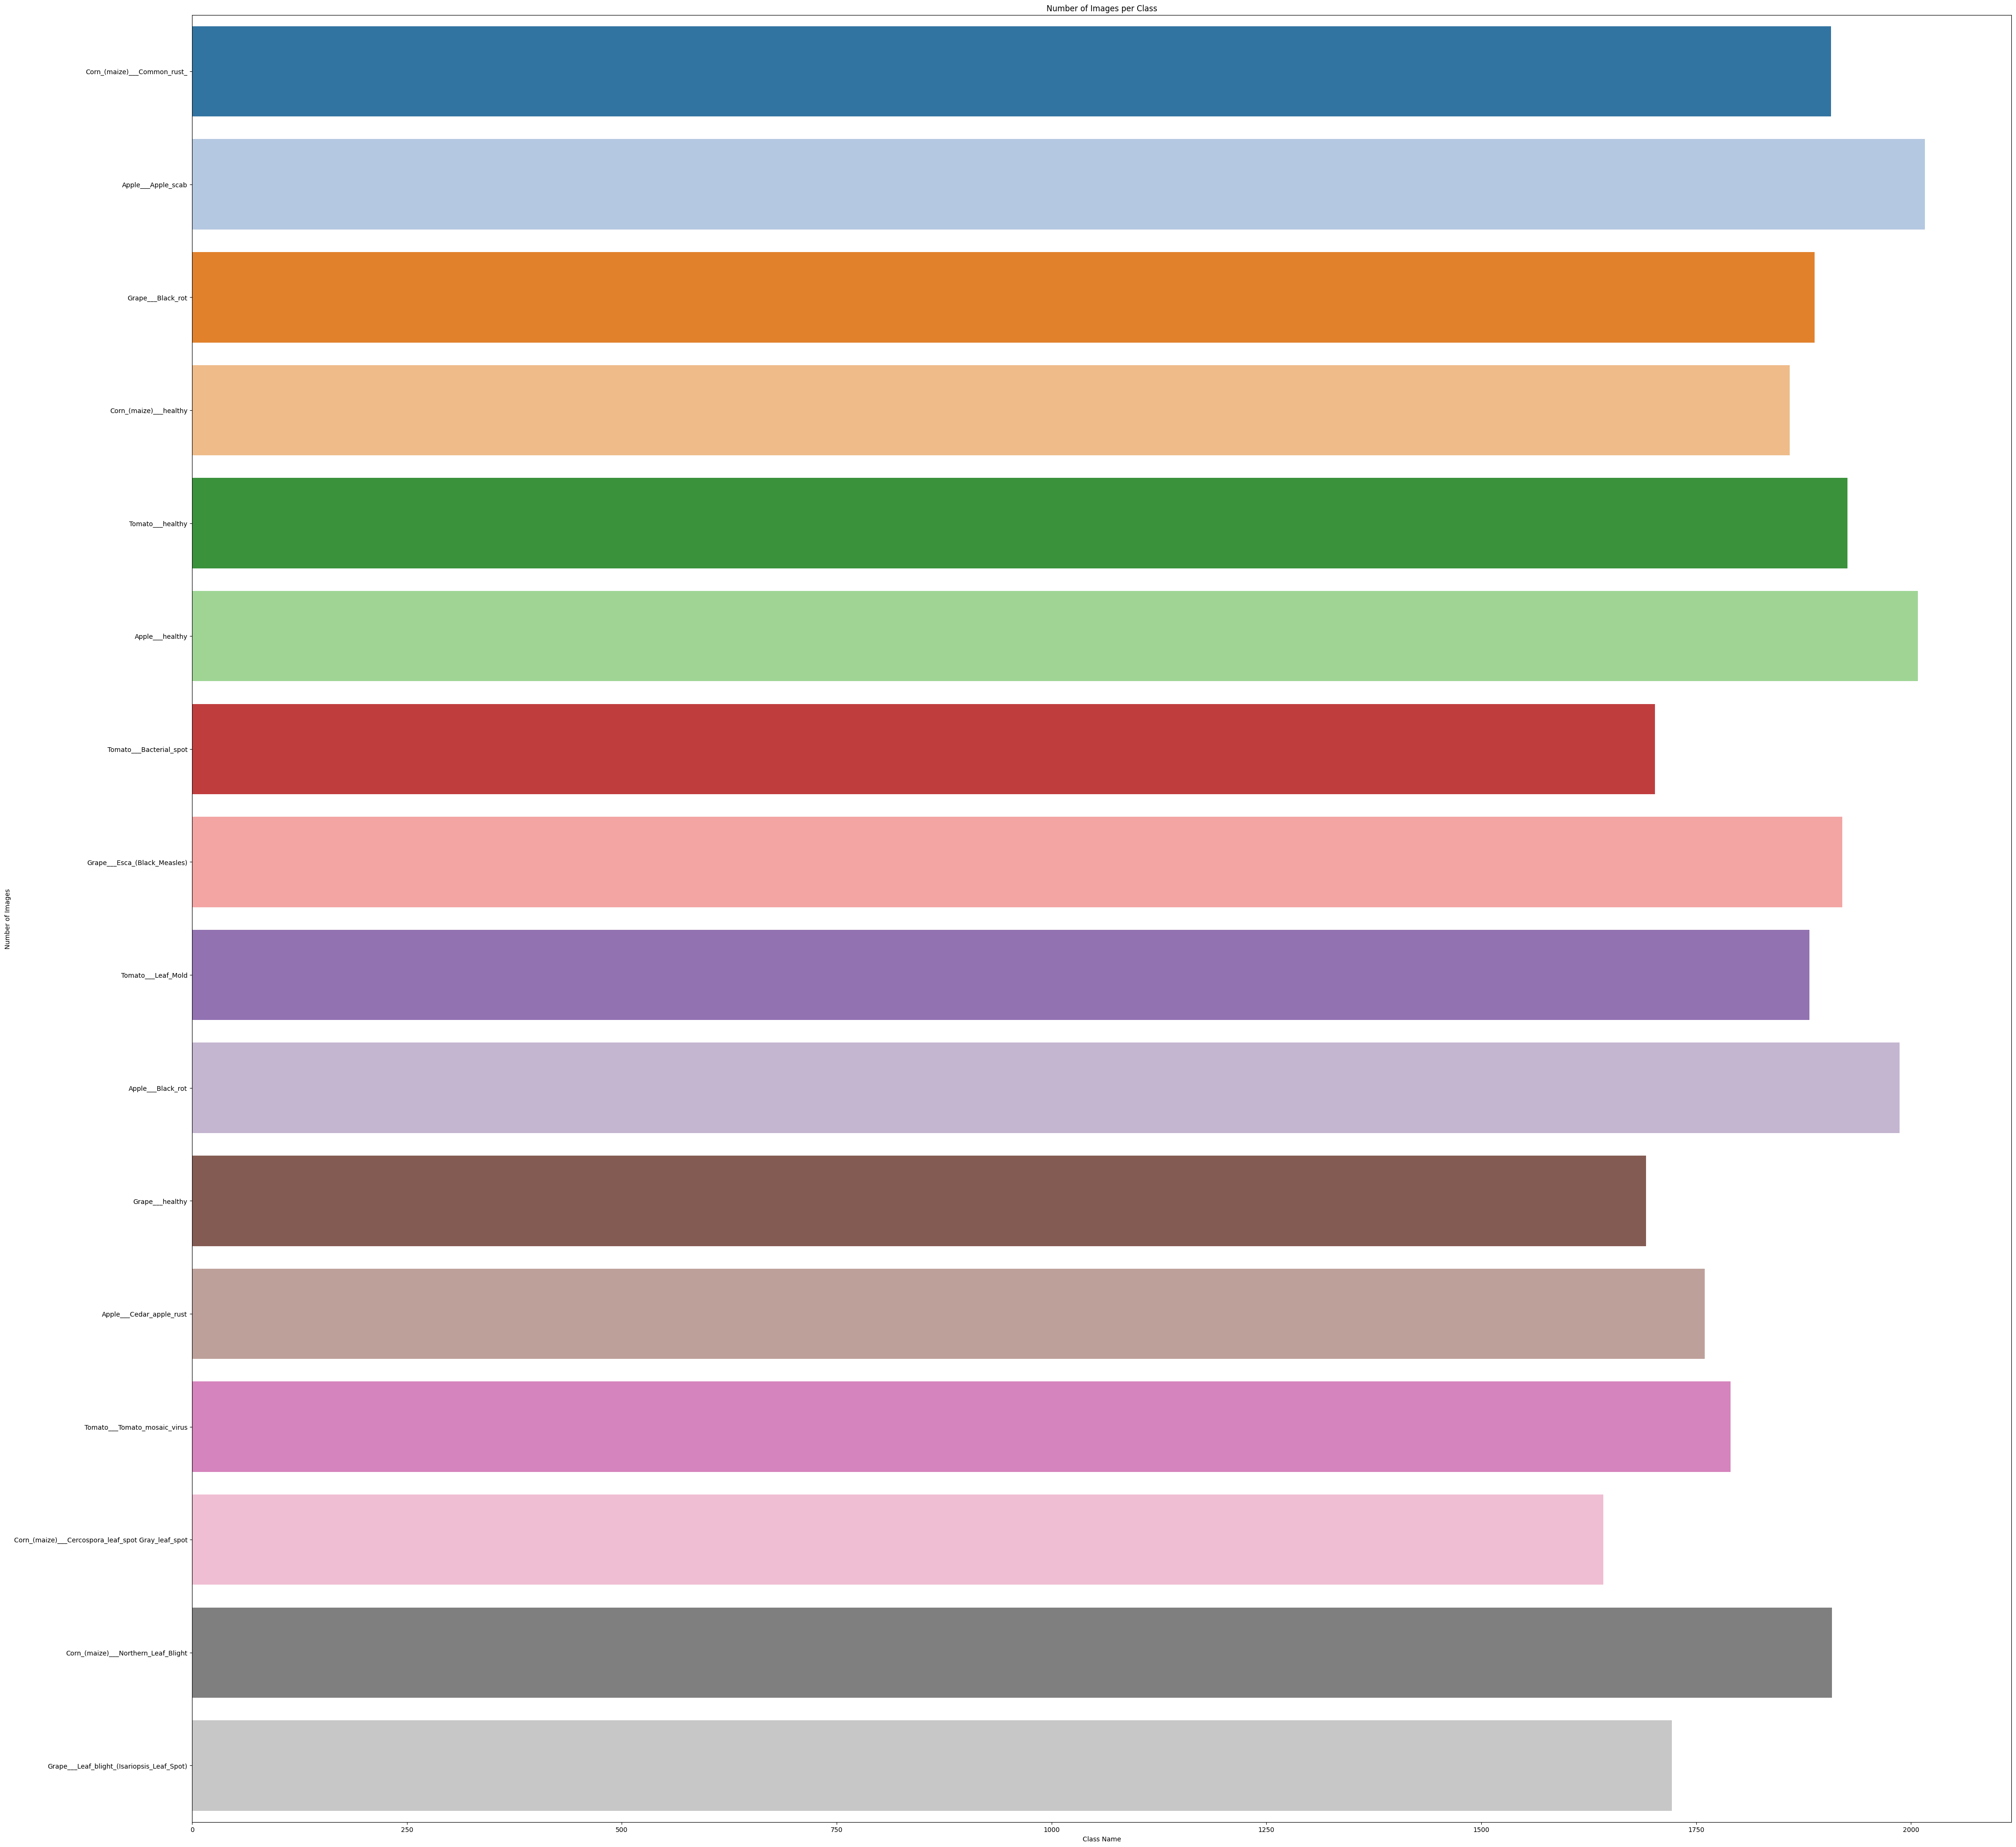

In [14]:
plt.figure(figsize=(50,50))
sns.barplot(y='Class Name', x='Number of Images', data=images_each_class,palette="tab20")
plt.title('Number of Images per Class')
plt.xlabel('Class Name')
plt.ylabel('Number of Images')
plt.show()

In [15]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Khai báo ImageDataGenerator cho dữ liệu train
train_datagen = ImageDataGenerator(rescale=1./255)  # Rescale hình ảnh

# Tạo dữ liệu train từ thư mục
train_generator = train_datagen.flow_from_directory(
    train_path,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)

# Khai báo ImageDataGenerator cho dữ liệu validation
valid_datagen = ImageDataGenerator(rescale=1./255)  # Rescale hình ảnh

# Tạo dữ liệu validation từ thư mục
valid_generator = valid_datagen.flow_from_directory(
    valid_path,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)


Found 29609 images belonging to 16 classes.
Found 7401 images belonging to 16 classes.


In [16]:
import tensorflow
from tensorflow import keras
from keras.models import Sequential,load_model,Model
from keras.layers import Conv2D,MaxPool2D,AveragePooling2D,Dense,Flatten,ZeroPadding2D,BatchNormalization,Activation,Add,Input,Dropout,GlobalAveragePooling2D
from keras.optimizers import SGD
from keras.initializers import glorot_uniform
from keras.callbacks import ModelCheckpoint,EarlyStopping,ReduceLROnPlateau


In [17]:
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout, BatchNormalization

In [18]:
# Tải VGG19 với các trọng số pre-trained từ ImageNet
vgg19_model = tf.keras.applications.VGG19(weights='imagenet', include_top=False, input_shape=(224, 224, 3))


80134624/80134624 [==============================] - 1s 0us/step


In [19]:
# Đóng băng các lớp của mô hình VGG19 để không huấn luyện lại
for layer in vgg19_model.layers:
    layer.trainable = False

In [20]:
# Thêm các lớp đầu ra tùy chỉnh
x = vgg19_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)
x = Dropout(0.5)(x)  # Dropout để giảm overfitting
x = Dense(512, activation='relu')(x)
x = BatchNormalization()(x)
x = Dropout(0.5)(x)
predictions = Dense(16, activation='softmax')(x)

In [21]:
model = Model(inputs=vgg19_model.input, outputs=predictions)

In [22]:
# Các hàm đánh giá tùy chỉnh
def recall(y_true, y_pred):
    true_positives = tf.reduce_sum(tf.round(tf.clip_by_value(y_true * y_pred, 0, 1)))
    possible_positives = tf.reduce_sum(tf.round(tf.clip_by_value(y_true, 0, 1)))
    recall_m = true_positives / (possible_positives + tf.keras.backend.epsilon())
    return recall_m

def precision(y_true, y_pred):
    true_positives = tf.reduce_sum(tf.round(tf.clip_by_value(y_true * y_pred, 0, 1)))
    predicted_positives = tf.reduce_sum(tf.round(tf.clip_by_value(y_pred, 0, 1)))
    precision_m = true_positives / (predicted_positives + tf.keras.backend.epsilon())
    return precision_m

def f1(y_true, y_pred):
    precision_m = precision(y_true, y_pred)
    recall_m = recall(y_true, y_pred)
    return 2 * ((precision_m * recall_m) / (precision_m + recall_m + tf.keras.backend.epsilon()))

# Compile mô hình
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy', precision, recall, f1])


In [23]:
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

# Định nghĩa early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Định nghĩa model checkpoint callback với phần mở rộng .keras
model_checkpoint = ModelCheckpoint(
    'best_model.keras',
    monitor='val_loss',
    verbose=1,
    save_best_only=True,
    save_weights_only=False,
    mode='auto'
)



In [24]:
# Huấn luyện mô hình với các callback
model_history = model.fit(
    train_generator,
    epochs=20,
    steps_per_epoch=50,
    validation_data=valid_generator,
    validation_steps=25,
    callbacks=[model_checkpoint, early_stopping]
)

Epoch 1/20
50/50 [==============================] - ETA: 0s - loss: 3.2467 - accuracy: 0.1419 - precision: 0.2148 - recall: 0.0575 - f1: 0.0894
Epoch 1: val_loss improved from inf to 2.23084, saving model to best_model.keras
50/50 [==============================] - 27s 273ms/step - loss: 3.2467 - accuracy: 0.1419 - precision: 0.2148 - recall: 0.0575 - f1: 0.0894 - val_loss: 2.2308 - val_accuracy: 0.2562 - val_precision: 0.7800 - val_recall: 0.0550 - val_f1: 0.1018
Epoch 2/20
50/50 [==============================] - ETA: 0s - loss: 2.0832 - accuracy: 0.3325 - precision: 0.4794 - recall: 0.2106 - f1: 0.2887
Epoch 2: val_loss improved from 2.23084 to 1.45614, saving model to best_model.keras
50/50 [==============================] - 13s 261ms/step - loss: 2.0832 - accuracy: 0.3325 - precision: 0.4794 - recall: 0.2106 - f1: 0.2887 - val_loss: 1.4561 - val_accuracy: 0.6538 - val_precision: 0.9542 - val_recall: 0.1088 - val_f1: 0.1913
Epoch 3/20
50/50 [==============================] - ETA: 0

In [25]:
from tensorflow.keras.models import load_model

# Lưu model
model.save('model_vgg.h5')


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


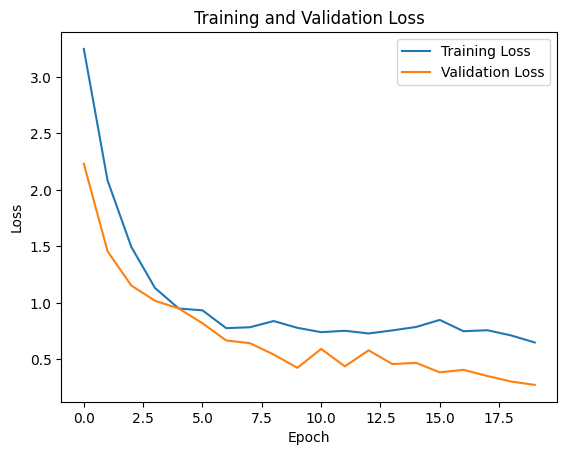

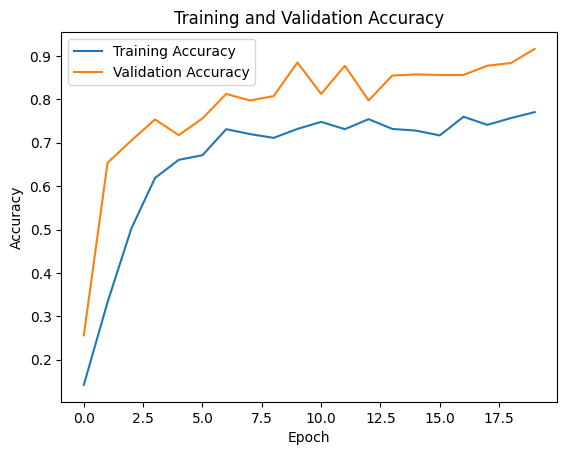

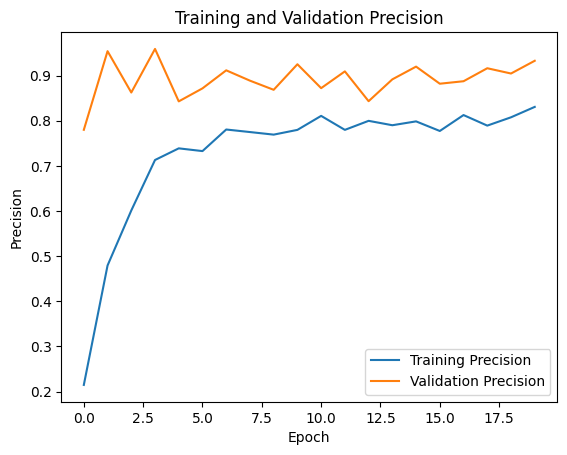

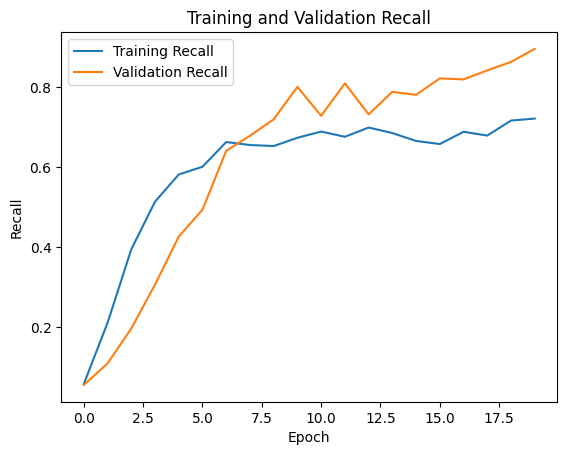

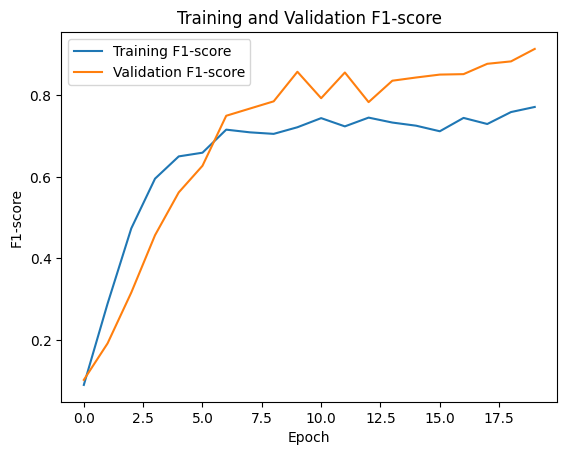

In [26]:
import matplotlib.pyplot as plt

# Lấy lịch sử huấn luyện từ model
history = model_history.history

# Biểu đồ loss
plt.plot(history['loss'], label='Training Loss')
plt.plot(history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Biểu đồ accuracy
plt.plot(history['accuracy'], label='Training Accuracy')
plt.plot(history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Biểu đồ precision
plt.plot(history['precision'], label='Training Precision')
plt.plot(history['val_precision'], label='Validation Precision')
plt.title('Training and Validation Precision')
plt.xlabel('Epoch')
plt.ylabel('Precision')
plt.legend()
plt.show()

# Biểu đồ recall
plt.plot(history['recall'], label='Training Recall')
plt.plot(history['val_recall'], label='Validation Recall')
plt.title('Training and Validation Recall')
plt.xlabel('Epoch')
plt.ylabel('Recall')
plt.legend()
plt.show()

# Biểu đồ F1-score
plt.plot(history['f1'], label='Training F1-score')
plt.plot(history['val_f1'], label='Validation F1-score')
plt.title('Training and Validation F1-score')
plt.xlabel('Epoch')
plt.ylabel('F1-score')
plt.legend()
plt.show()


In [28]:
from tensorflow.keras.optimizers import Adam

# Tạo optimizer mới
optimizer = SGD()

# Biên dịch mô hình với optimizer mới
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy', precision, recall, f1])



In [32]:
# Tiếp tục huấn luyện model
model_history = model.fit(
    train_generator,
    epochs=20,
    steps_per_epoch=50,
    validation_data=valid_generator,
    validation_steps=50
)

Epoch 1/20
50/50 [==============================] - 14s 290ms/step - loss: 0.6947 - accuracy: 0.7525 - precision: 0.7966 - recall: 0.7056 - f1: 0.7476 - val_loss: 0.3373 - val_accuracy: 0.8894 - val_precision: 0.9138 - val_recall: 0.8537 - val_f1: 0.8822
Epoch 2/20
50/50 [==============================] - 15s 293ms/step - loss: 0.6222 - accuracy: 0.7850 - precision: 0.8252 - recall: 0.7300 - f1: 0.7742 - val_loss: 0.3357 - val_accuracy: 0.8756 - val_precision: 0.8976 - val_recall: 0.8469 - val_f1: 0.8711
Epoch 3/20
50/50 [==============================] - 18s 358ms/step - loss: 0.6592 - accuracy: 0.7638 - precision: 0.8113 - recall: 0.7206 - f1: 0.7627 - val_loss: 0.3121 - val_accuracy: 0.8950 - val_precision: 0.9243 - val_recall: 0.8719 - val_f1: 0.8969
Epoch 4/20
50/50 [==============================] - 15s 297ms/step - loss: 0.6876 - accuracy: 0.7594 - precision: 0.8030 - recall: 0.7075 - f1: 0.7514 - val_loss: 0.3206 - val_accuracy: 0.8825 - val_precision: 0.9002 - val_recall: 0.85

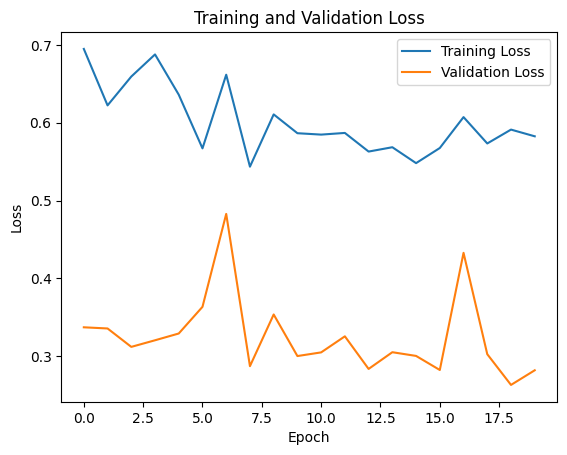

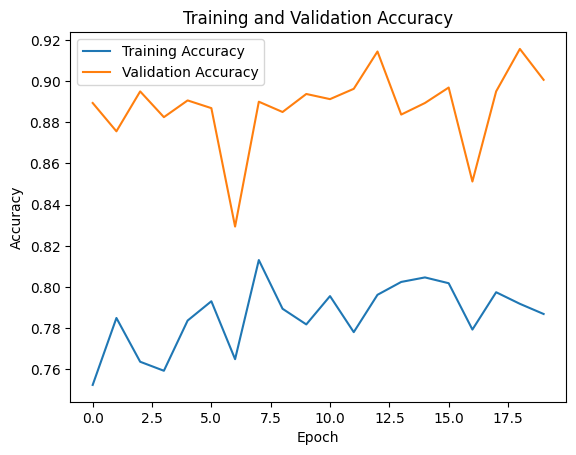

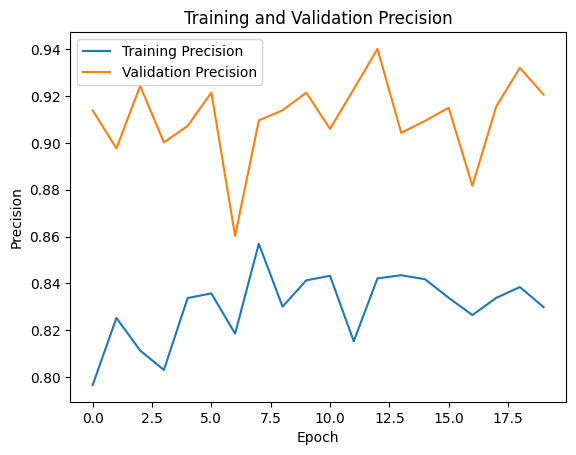

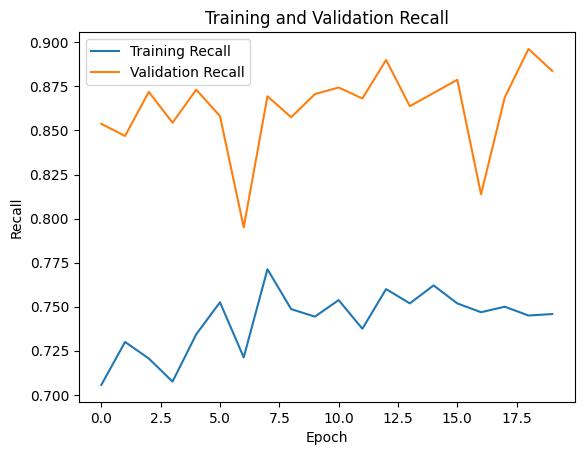

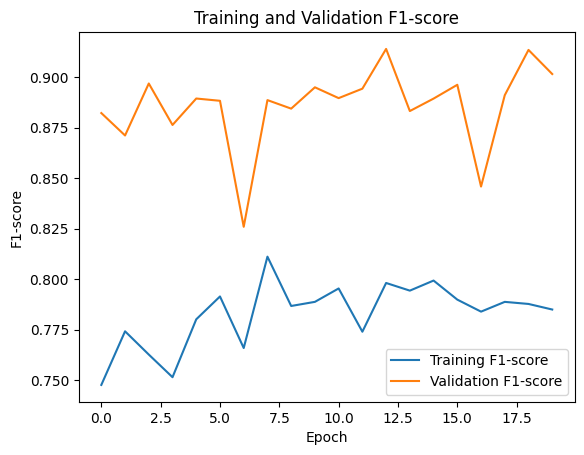

In [33]:
import matplotlib.pyplot as plt

# Lấy lịch sử huấn luyện từ model
history = model_history.history

# Biểu đồ loss
plt.plot(history['loss'], label='Training Loss')
plt.plot(history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Biểu đồ accuracy
plt.plot(history['accuracy'], label='Training Accuracy')
plt.plot(history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Biểu đồ precision
plt.plot(history['precision'], label='Training Precision')
plt.plot(history['val_precision'], label='Validation Precision')
plt.title('Training and Validation Precision')
plt.xlabel('Epoch')
plt.ylabel('Precision')
plt.legend()
plt.show()

# Biểu đồ recall
plt.plot(history['recall'], label='Training Recall')
plt.plot(history['val_recall'], label='Validation Recall')
plt.title('Training and Validation Recall')
plt.xlabel('Epoch')
plt.ylabel('Recall')
plt.legend()
plt.show()

# Biểu đồ F1-score
plt.plot(history['f1'], label='Training F1-score')
plt.plot(history['val_f1'], label='Validation F1-score')
plt.title('Training and Validation F1-score')
plt.xlabel('Epoch')
plt.ylabel('F1-score')
plt.legend()
plt.show()


In [35]:
# Tải desetnet201 với các trọng số pre-trained từ ImageNet
densenet201_model = tf.keras.applications.DenseNet201(weights='imagenet', include_top=False, input_shape=(224, 224, 3))


In [36]:
# Đóng băng các lớp của mô hình VGG19 để không huấn luyện lại
for layer in densenet201_model.layers:
    layer.trainable = False

In [37]:
# Thêm các lớp đầu ra tùy chỉnh
x = densenet201_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)
x = Dropout(0.5)(x)  # Dropout để giảm overfitting
x = Dense(512, activation='relu')(x)
x = BatchNormalization()(x)
x = Dropout(0.5)(x)
predictions = Dense(16, activation='softmax')(x)

In [38]:
modelDenseNet = Model(inputs=densenet201_model.input, outputs=predictions)

In [39]:
modelDenseNet.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy', precision, recall, f1])

In [65]:
# prompt: sumary model trên

modelDenseNet.summary()


Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_3 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 zero_padding2d_2 (ZeroPadd  (None, 230, 230, 3)          0         ['input_3[0][0]']             
 ing2D)                                                                                           
                                                                                                  
 conv1/conv (Conv2D)         (None, 112, 112, 64)         9408      ['zero_padding2d_2[0][0]']    
                                                                                                  
 conv1/bn (BatchNormalizati  (None, 112, 112, 64)         256       ['conv1/conv[0][0]']    

In [40]:
# Huấn luyện mô hình với các callback
model_history = modelDenseNet.fit(
    train_generator,
    epochs=20,
    steps_per_epoch=50,
    validation_data=valid_generator,
    validation_steps=50,
    callbacks=[model_checkpoint, early_stopping]
)

Epoch 1/20
50/50 [==============================] - ETA: 0s - loss: 2.0298 - accuracy: 0.4147 - precision: 0.5297 - recall: 0.3083 - f1: 0.3851
Epoch 1: val_loss did not improve from 0.27340
50/50 [==============================] - 41s 467ms/step - loss: 2.0298 - accuracy: 0.4147 - precision: 0.5297 - recall: 0.3083 - f1: 0.3851 - val_loss: 1.4738 - val_accuracy: 0.5619 - val_precision: 0.6051 - val_recall: 0.5250 - val_f1: 0.5614
Epoch 2/20
50/50 [==============================] - ETA: 0s - loss: 0.8400 - accuracy: 0.7275 - precision: 0.7844 - recall: 0.6581 - f1: 0.7142
Epoch 2: val_loss did not improve from 0.27340
50/50 [==============================] - 18s 364ms/step - loss: 0.8400 - accuracy: 0.7275 - precision: 0.7844 - recall: 0.6581 - f1: 0.7142 - val_loss: 0.3184 - val_accuracy: 0.8969 - val_precision: 0.9175 - val_recall: 0.8637 - val_f1: 0.8893
Epoch 3/20
50/50 [==============================] - ETA: 0s - loss: 0.4867 - accuracy: 0.8363 - precision: 0.8614 - recall: 0.7987

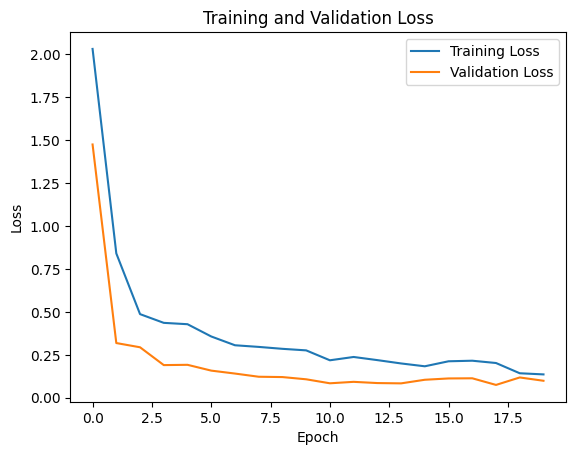

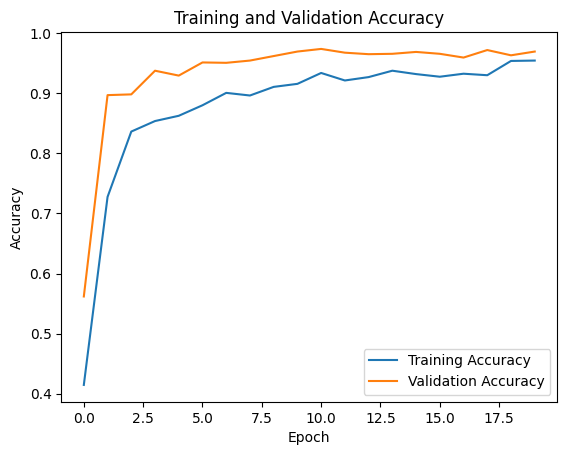

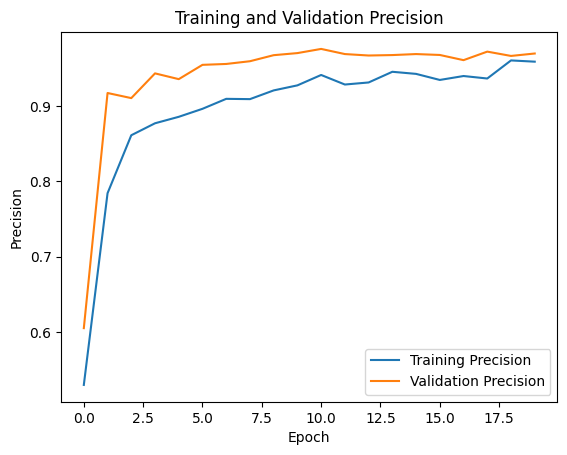

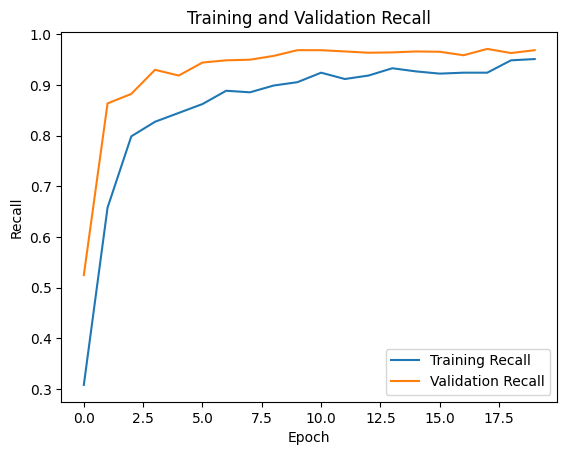

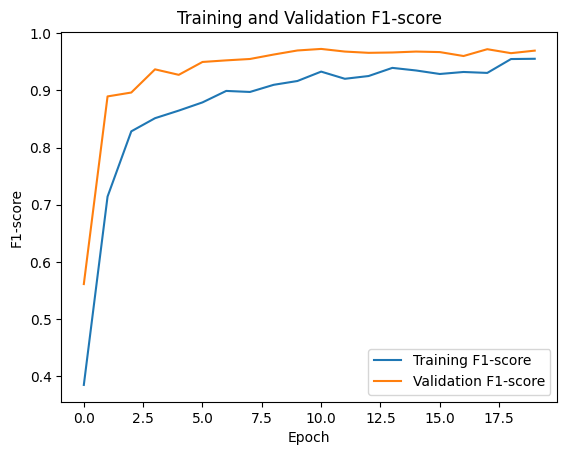

In [41]:
import matplotlib.pyplot as plt

# Lấy lịch sử huấn luyện từ model
history = model_history.history

# Biểu đồ loss
plt.plot(history['loss'], label='Training Loss')
plt.plot(history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Biểu đồ accuracy
plt.plot(history['accuracy'], label='Training Accuracy')
plt.plot(history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Biểu đồ precision
plt.plot(history['precision'], label='Training Precision')
plt.plot(history['val_precision'], label='Validation Precision')
plt.title('Training and Validation Precision')
plt.xlabel('Epoch')
plt.ylabel('Precision')
plt.legend()
plt.show()

# Biểu đồ recall
plt.plot(history['recall'], label='Training Recall')
plt.plot(history['val_recall'], label='Validation Recall')
plt.title('Training and Validation Recall')
plt.xlabel('Epoch')
plt.ylabel('Recall')
plt.legend()
plt.show()

# Biểu đồ F1-score
plt.plot(history['f1'], label='Training F1-score')
plt.plot(history['val_f1'], label='Validation F1-score')
plt.title('Training and Validation F1-score')
plt.xlabel('Epoch')
plt.ylabel('F1-score')
plt.legend()
plt.show()


In [42]:
optimizer = SGD()

# Biên dịch mô hình với optimizer mới
modelDenseNet.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy', precision, recall, f1])

In [43]:
# Huấn luyện mô hình với các callback
model_history = modelDenseNet.fit(
    train_generator,
    epochs=20,
    steps_per_epoch=50,
    validation_data=valid_generator,
    validation_steps=50,
    callbacks=[model_checkpoint, early_stopping]
)

Epoch 1/20
50/50 [==============================] - ETA: 0s - loss: 0.1505 - accuracy: 0.9506 - precision: 0.9541 - recall: 0.9475 - f1: 0.9507
Epoch 1: val_loss improved from 0.07476 to 0.05653, saving model to best_model.keras
50/50 [==============================] - 39s 545ms/step - loss: 0.1505 - accuracy: 0.9506 - precision: 0.9541 - recall: 0.9475 - f1: 0.9507 - val_loss: 0.0565 - val_accuracy: 0.9800 - val_precision: 0.9806 - val_recall: 0.9787 - val_f1: 0.9797
Epoch 2/20
50/50 [==============================] - ETA: 0s - loss: 0.1249 - accuracy: 0.9594 - precision: 0.9641 - recall: 0.9556 - f1: 0.9598
Epoch 2: val_loss did not improve from 0.05653
50/50 [==============================] - 14s 289ms/step - loss: 0.1249 - accuracy: 0.9594 - precision: 0.9641 - recall: 0.9556 - f1: 0.9598 - val_loss: 0.0639 - val_accuracy: 0.9806 - val_precision: 0.9818 - val_recall: 0.9800 - val_f1: 0.9809
Epoch 3/20
50/50 [==============================] - ETA: 0s - loss: 0.1009 - accuracy: 0.965

In [45]:
# prompt: lưu model vừa train

modelDenseNet.save('/content/drive/MyDrive/Colab Notebooks/GPU_RUN/Plant Disease/VGG19/modelDensetNet201.h5')

modelDenseNet.save('/content/drive/MyDrive/Colab Notebooks/GPU_RUN/Plant Disease/VGG19/modelDensetNet201.keras')


In [46]:
# prompt: lưu model vừa train

modelDenseNet.save('modelDensetNet201.h5')

modelDenseNet.save('modelDensetNet201.keras')


In [47]:
vgg16_model = tf.keras.applications.VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))


58889256/58889256 [==============================] - 1s 0us/step


In [48]:
# Đóng băng các lớp của mô hình VGG19 để không huấn luyện lại
for layer in vgg16_model.layers:
    layer.trainable = False

In [50]:
# Thêm các lớp đầu ra tùy chỉnh
x = vgg16_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)
x = Dropout(0.5)(x)  # Dropout để giảm overfitting
x = Dense(512, activation='relu')(x)
x = BatchNormalization()(x)
x = Dropout(0.5)(x)
predictions = Dense(16, activation='softmax')(x)

In [51]:
model_vgg16 = Model(inputs=vgg16_model.input, outputs=predictions)

In [52]:
model_vgg16.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy', precision, recall, f1])

In [53]:
# Huấn luyện mô hình với các callback
model_history_vgg16 = model_vgg16.fit(
    train_generator,
    epochs=20,
    steps_per_epoch=50,
    validation_data=valid_generator,
    validation_steps=50,
    callbacks=[model_checkpoint, early_stopping]
)

Epoch 1/20
50/50 [==============================] - ETA: 0s - loss: 2.9964 - accuracy: 0.1937 - precision: 0.2611 - recall: 0.0944 - f1: 0.1369
Epoch 1: val_loss did not improve from 0.03693
50/50 [==============================] - 19s 342ms/step - loss: 2.9964 - accuracy: 0.1937 - precision: 0.2611 - recall: 0.0944 - f1: 0.1369 - val_loss: 2.0074 - val_accuracy: 0.3831 - val_precision: 0.5400 - val_recall: 0.0244 - val_f1: 0.0462
Epoch 2/20
50/50 [==============================] - ETA: 0s - loss: 1.8648 - accuracy: 0.4219 - precision: 0.5718 - recall: 0.3187 - f1: 0.4052
Epoch 2: val_loss did not improve from 0.03693
50/50 [==============================] - 12s 244ms/step - loss: 1.8648 - accuracy: 0.4219 - precision: 0.5718 - recall: 0.3187 - f1: 0.4052 - val_loss: 1.3559 - val_accuracy: 0.6669 - val_precision: 0.9134 - val_recall: 0.1681 - val_f1: 0.2782
Epoch 3/20
50/50 [==============================] - ETA: 0s - loss: 1.1853 - accuracy: 0.5856 - precision: 0.6738 - recall: 0.4913

In [54]:
optimizer = SGD()

# Biên dịch mô hình với optimizer mới
model_vgg16.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy', precision, recall, f1])

In [55]:
# Huấn luyện mô hình với các callback
model_history_vgg16 = model_vgg16.fit(
    train_generator,
    epochs=20,
    steps_per_epoch=50,
    validation_data=valid_generator,
    validation_steps=50,
    callbacks=[model_checkpoint, early_stopping]
)

Epoch 1/20
50/50 [==============================] - ETA: 0s - loss: 0.5537 - accuracy: 0.8100 - precision: 0.8497 - recall: 0.7738 - f1: 0.8095
Epoch 1: val_loss did not improve from 0.03693
50/50 [==============================] - 18s 340ms/step - loss: 0.5537 - accuracy: 0.8100 - precision: 0.8497 - recall: 0.7738 - f1: 0.8095 - val_loss: 0.3081 - val_accuracy: 0.8831 - val_precision: 0.9001 - val_recall: 0.8669 - val_f1: 0.8828
Epoch 2/20
50/50 [==============================] - ETA: 0s - loss: 0.4905 - accuracy: 0.8350 - precision: 0.8594 - recall: 0.8000 - f1: 0.8283
Epoch 2: val_loss did not improve from 0.03693
50/50 [==============================] - 17s 332ms/step - loss: 0.4905 - accuracy: 0.8350 - precision: 0.8594 - recall: 0.8000 - f1: 0.8283 - val_loss: 0.2287 - val_accuracy: 0.9225 - val_precision: 0.9336 - val_recall: 0.9069 - val_f1: 0.9198
Epoch 3/20
50/50 [==============================] - ETA: 0s - loss: 0.5709 - accuracy: 0.8025 - precision: 0.8334 - recall: 0.7606

Plot for DensseNet201 SGD


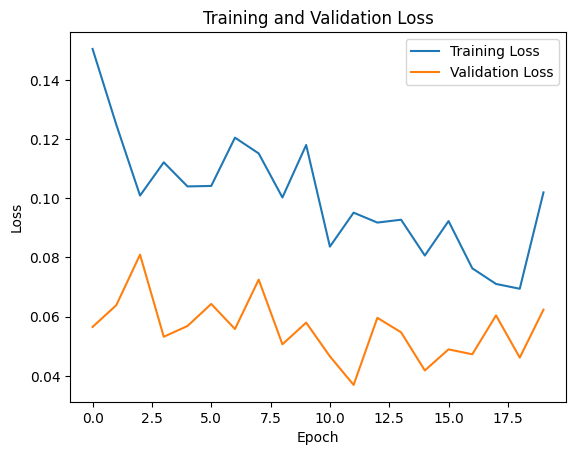

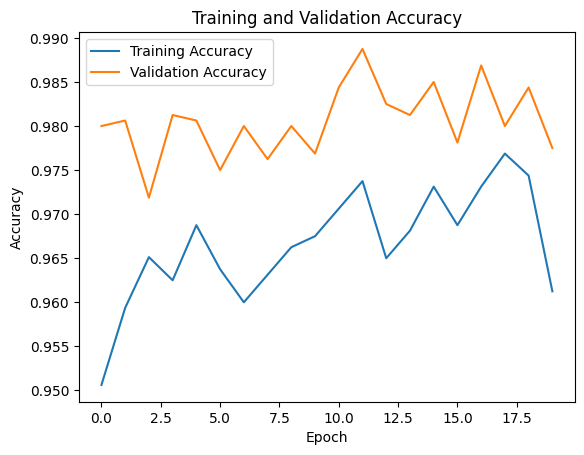

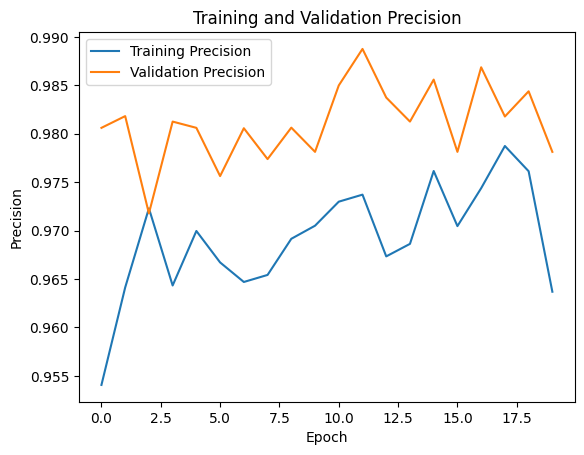

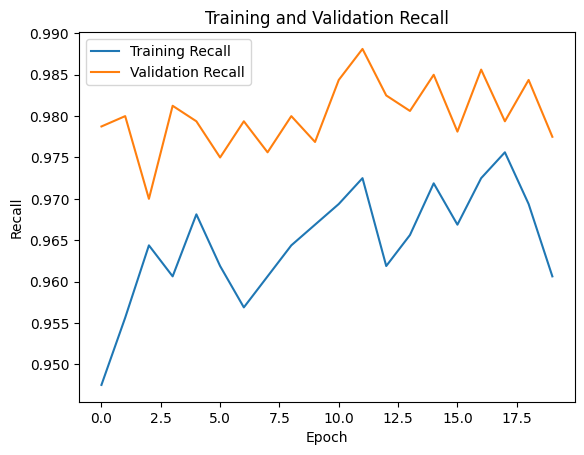

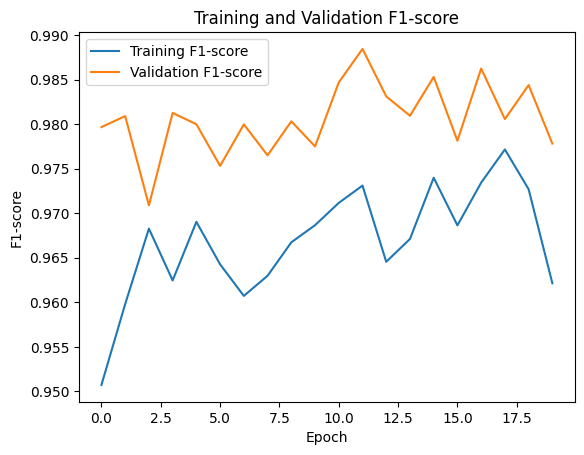

In [56]:
import matplotlib.pyplot as plt

# Lấy lịch sử huấn luyện từ model
history = model_history.history

# Biểu đồ loss
plt.plot(history['loss'], label='Training Loss')
plt.plot(history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Biểu đồ accuracy
plt.plot(history['accuracy'], label='Training Accuracy')
plt.plot(history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Biểu đồ precision
plt.plot(history['precision'], label='Training Precision')
plt.plot(history['val_precision'], label='Validation Precision')
plt.title('Training and Validation Precision')
plt.xlabel('Epoch')
plt.ylabel('Precision')
plt.legend()
plt.show()

# Biểu đồ recall
plt.plot(history['recall'], label='Training Recall')
plt.plot(history['val_recall'], label='Validation Recall')
plt.title('Training and Validation Recall')
plt.xlabel('Epoch')
plt.ylabel('Recall')
plt.legend()
plt.show()

# Biểu đồ F1-score
plt.plot(history['f1'], label='Training F1-score')
plt.plot(history['val_f1'], label='Validation F1-score')
plt.title('Training and Validation F1-score')
plt.xlabel('Epoch')
plt.ylabel('F1-score')
plt.legend()
plt.show()


plot for VGG 16 SGD


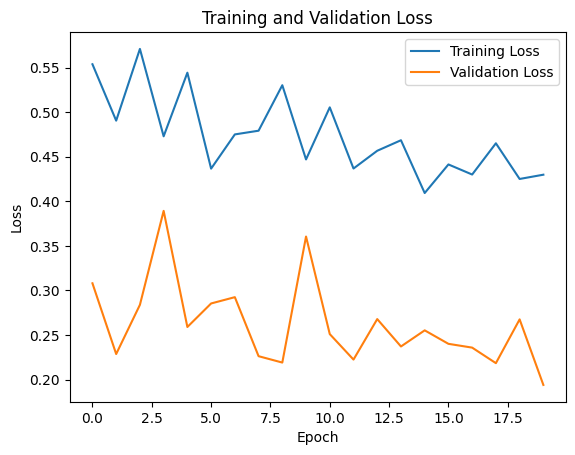

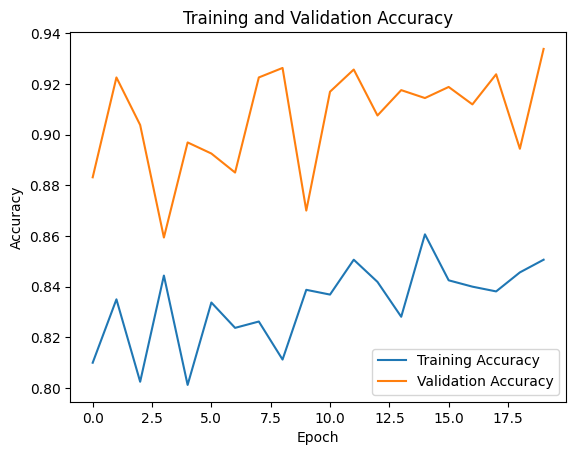

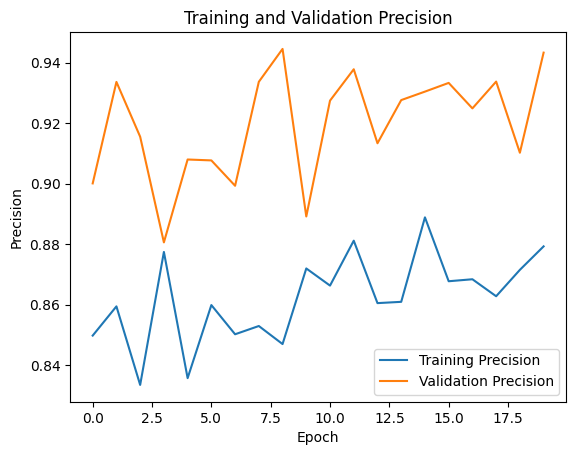

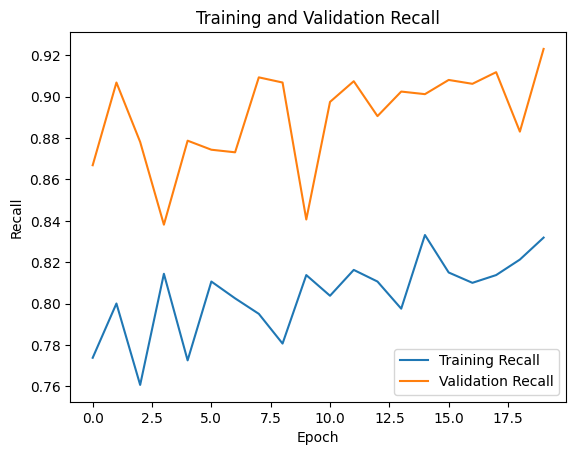

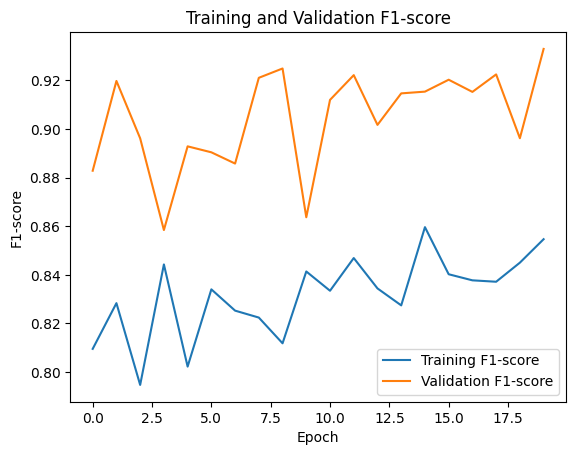

In [57]:
import matplotlib.pyplot as plt

# Lấy lịch sử huấn luyện từ model
history = model_history_vgg16.history

# Biểu đồ loss
plt.plot(history['loss'], label='Training Loss')
plt.plot(history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Biểu đồ accuracy
plt.plot(history['accuracy'], label='Training Accuracy')
plt.plot(history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Biểu đồ precision
plt.plot(history['precision'], label='Training Precision')
plt.plot(history['val_precision'], label='Validation Precision')
plt.title('Training and Validation Precision')
plt.xlabel('Epoch')
plt.ylabel('Precision')
plt.legend()
plt.show()

# Biểu đồ recall
plt.plot(history['recall'], label='Training Recall')
plt.plot(history['val_recall'], label='Validation Recall')
plt.title('Training and Validation Recall')
plt.xlabel('Epoch')
plt.ylabel('Recall')
plt.legend()
plt.show()

# Biểu đồ F1-score
plt.plot(history['f1'], label='Training F1-score')
plt.plot(history['val_f1'], label='Validation F1-score')
plt.title('Training and Validation F1-score')
plt.xlabel('Epoch')
plt.ylabel('F1-score')
plt.legend()
plt.show()


In [58]:
# prompt: lưu model vừa train

model_vgg16.save('/content/drive/MyDrive/Colab Notebooks/GPU_RUN/Plant Disease/VGG19/model_vgg16.h5')

model_vgg16.save('/content/drive/MyDrive/Colab Notebooks/GPU_RUN/Plant Disease/VGG19/model_vgg16.keras')


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [66]:
model_vgg16.summary()

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0   

In [61]:

from sklearn.metrics import confusion_matrix

# Dự đoán nhãn cho tập dữ liệu validation
predicted_labels = modelDenseNet.predict(valid_generator)

# Chuyển đổi nhãn dự đoán thành nhãn số nguyên
predicted_labels = np.argmax(predicted_labels, axis=1)

# Lấy nhãn thực sự từ générator
true_labels = valid_generator.classes

# Tính ma trận nhầm lẫn
confusion_matrix = confusion_matrix(true_labels, predicted_labels)

# In ra ma trận nhầm lẫn
print(confusion_matrix)


232/232 [==============================] - 38s 151ms/step
[[28 26 28 34 33 36 30 31 29 41 39 28 22 35 42 22]
 [24 34 35 34 30 38 32 30 32 29 21 29 35 37 32 25]
 [35 34 27 30 21 25 35 24 27 27 21 29 23 20 27 35]
 [27 30 28 39 26 35 28 35 36 29 29 34 25 32 24 45]
 [35 23 27 24 28 23 22 24 19 22 27 23 27 22 33 31]
 [35 33 26 38 21 29 28 31 35 23 38 29 26 32 22 31]
 [31 35 30 24 20 31 48 20 25 35 25 26 26 27 38 36]
 [44 34 21 33 17 25 33 30 33 38 21 25 25 28 30 28]
 [32 29 29 27 31 29 34 38 22 46 21 21 23 33 26 31]
 [31 31 36 36 26 24 34 32 40 31 27 24 32 28 21 27]
 [34 31 26 23 24 34 31 24 23 23 24 28 19 30 27 29]
 [29 32 29 31 17 25 33 26 35 24 24 16 22 34 20 26]
 [30 37 19 39 26 28 24 29 24 32 23 26 20 25 16 27]
 [27 24 26 30 13 34 36 33 35 30 33 31 36 23 27 32]
 [37 35 30 27 18 33 27 21 25 25 26 26 33 28 32 25]
 [26 27 23 34 26 27 35 38 37 21 30 28 32 39 29 29]]


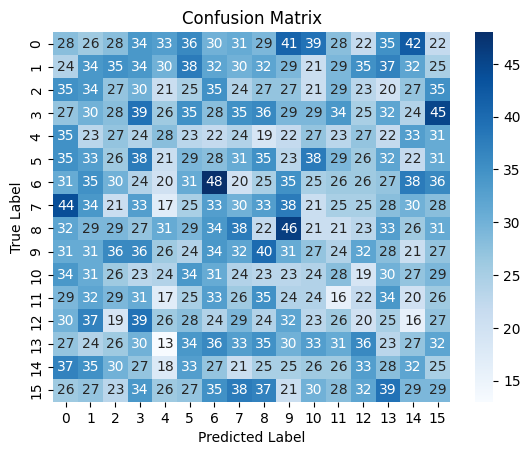

In [62]:
import seaborn as sns
import matplotlib.pyplot as plt

# Vẽ biểu đồ ma trận nhầm lẫn
sns.heatmap(confusion_matrix, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()
